In [1]:
import sys
sys.path.append('../')

from quantumsim import *
from pennylane import numpy as np
import matplotlib.pyplot as plt
from copy import copy


## Estas funcion calcula los valores de forma exacta
def FHExacto(params):
    qubits = params["sites"]*2
    hopping = params["hopping"]
    potential = params["potential"]
    fermi_sentence = 0.0
    fermi_hopping = 0.0
    fermi_potential = 0.0
    

    if params["sites"] == 1:
        fermi_sentence +=  potential*FermiC(0)*FermiA(0)*FermiC(1)*FermiA(1)
    else:
        for i in range(params["sites"]-1):
            if hopping != 0.0:
                fermi_hopping +=  FermiC(2*i)*FermiA(2*i +2) + FermiC(2*i +2)*FermiA(2*i)
                fermi_hopping +=  FermiC(2*i+1)*FermiA(2*i +3) + FermiC(2*i +3)*FermiA(2*i +1)  
            
        for i in range(params["sites"]):
            if potential != 0.0:
                fermi_potential += FermiC(2*i)*FermiA(2*i)*FermiC(2*i +1)*FermiA(2*i +1)

        if params["pattern"] == "close" and params["sites"] != 2:
            qsite = 2*(params["sites"]-1)
            fermi_hopping +=  FermiC(0)*FermiA(qsite) + FermiC(qsite)*FermiA(0)
            fermi_hopping +=  FermiC(1)*FermiA(qsite+1) + FermiC(qsite+1)*FermiA(1) 

    fermi_sentence = -hopping*fermi_hopping + potential*fermi_potential

    h = qml.jordan_wigner( fermi_sentence)
    val, vec = np.linalg.eigh(h.sparse_matrix().toarray())
    return np.sort( val )

## Fermi-Hubbard

In [2]:
params1 = {
    "sites": 6,  #Numero de sitios 2,4,6
    "hopping": 1, #Este hay que dejarlo fijo
    "potential": 2, #Este hay que variarlo
    "pattern": "close" #Este se puede variar <close> o <open>
}

hubbard_chain1 = vqe_fermihubbard(params1)
hubbard_chain1.set_group_characteristics()


### Open model

In [37]:
valores = []
for k in range(2):
    print(k+1)
    ansatz_params = {
        "repetitions": k+1,
        "base": "default.qubit",
        "interface": "autograd",
        "electrons": params1["sites"],
        "qubits": hubbard_chain1.qubits,
        "pattern": "chain"
    }

    differents_ansatz = []
    parameters = []

    ansazt = upccgsd_ansatz()
    ansazt.set_device( ansatz_params )
    ansazt.set_node( ansatz_params )
    ansazt.set_state( ansatz_params["electrons"] )
    a,b = qml.kUpCCGSD.shape(k=ansatz_params["repetitions"], n_wires=hubbard_chain1.qubits, delta_sz=0)

    minimizate_params = {
            "type": "SLSQP",
            "maxiter": 20,
            "tol": 1e-6,
            "number":  a*b,
            "theta":["generic", 0.3]}

    hubbard_chain1.node = ansazt.node
    optimizer = gradiend_optimizer(minimizate_params)
    energy1, optimum = optimizer.VQE(hubbard_chain1.cost_function)
    valores.append(energy1)

1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
2
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
3
+1
+1
+1
+1
+1
+1
+1
+1
+1


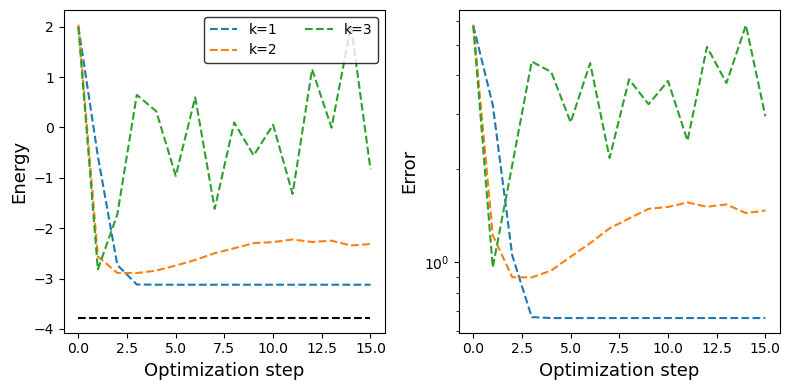

In [33]:
ee = FHExacto(params1)

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)
aux = max( [len(i) for i in valores] )

for i, val in enumerate(valores):
    ax[0].plot([j for j in range(len(val))], val, ls="dashed", label="k="+str(i+1))
    ax[1].plot([i for i in range(len(val))], [np.abs(val[j] -ee[0]) for j in range(len(val))], ls="dashed")
ax[0].plot([j for j in range( aux ) ], [ee[0] for j in range(aux)], color="black", ls="dashed")
ax[1].set_yscale("log")

ax[0].legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k', ncol=2)
fig.tight_layout()
plt.show()

In [34]:
valores = []
for k in range(1):
    ansatz_params = {
        "repetitions": k+1,
        "base": "default.qubit",
        "interface": "autograd",
        "electrons": params1["sites"],
        "qubits": hubbard_chain1.qubits,
        "pattern": "chain"
    }

    differents_ansatz = []
    parameters = []

    ansazt = uccds_ansatz()
    ansazt.set_device( ansatz_params )
    ansazt.set_node( ansatz_params )
    ansazt.set_state( ansatz_params["electrons"] )

    minimizate_params = {
            "type": "SLSQP",
            "maxiter": 30,
            "tol": 0.000001,
            "number":  len(ansazt.singles) + len(ansazt.doubles),
            "theta":["generic", 0.3]}

    hubbard_chain1.node = ansazt.node
    optimizer = gradiend_optimizer(minimizate_params)
    energy1, optimum = optimizer.VQE(hubbard_chain1.cost_function)
    valores.append(energy1)

+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1
+1


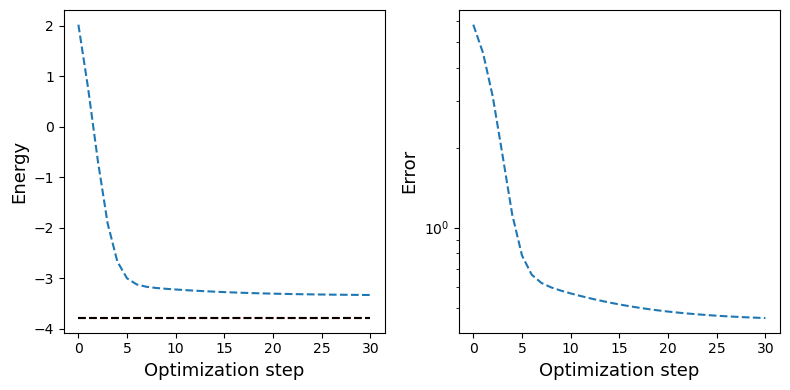

In [35]:
ee = FHExacto(params1)

fig, ax = plt.subplots(1, 2, figsize=(8,4),)
ax[0].set_xlabel("Optimization step", fontsize=13)
ax[0].set_ylabel("Energy", fontsize=13)

ax[1].set_xlabel("Optimization step", fontsize=13)
ax[1].set_ylabel("Error", fontsize=13)
aux = max( [len(i) for i in valores] )

for i, val in enumerate(valores):
    ax[0].plot([j for j in range(len(val))], val, ls="dashed", label="k="+str(i+1))
    ax[1].plot([i for i in range(len(val))], [np.abs(val[j] -ee[0]) for j in range(len(val))], ls="dashed")
ax[0].plot([j for j in range( aux ) ], [ee[0] for j in range(aux)], "r", ls="dashed")
ax[1].set_yscale("log")

ax[0].plot([j for j in range( aux ) ], [ee[0] for j in range(aux)], color="black", ls="dashed")
fig.tight_layout()
plt.show()